In [1]:
from collections import defaultdict
import os.path
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd

In [23]:
DATA_PATH = os.path.normpath(os.path.join(os.getcwd(), '../Data'))
CATEGORIES = list(filter(lambda path: os.path.isdir(os.path.join(DATA_PATH, path)) and len(path) == 1,
                         os.listdir(DATA_PATH)))
FRAME_RATE = 48000
FILE_AMOUNT_PER_CATEGORY = 3

def get_examples_of_each_category(n=FILE_AMOUNT_PER_CATEGORY):
    result = defaultdict(list)
    for c in CATEGORIES:
        for i, fn in enumerate(os.listdir(os.path.join(DATA_PATH, c))):
            if i == n:
                break
            path = os.path.join(DATA_PATH, c, fn)
            result[c].append((path, librosa.load(path, sr=FRAME_RATE)))
    return result

examples_of_cat = get_examples_of_each_category()

In [24]:
rows = len(CATEGORIES)
cols = FILE_AMOUNT_PER_CATEGORY

<ipython-input-30-867a1bd628bf>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(rows, cols, index)


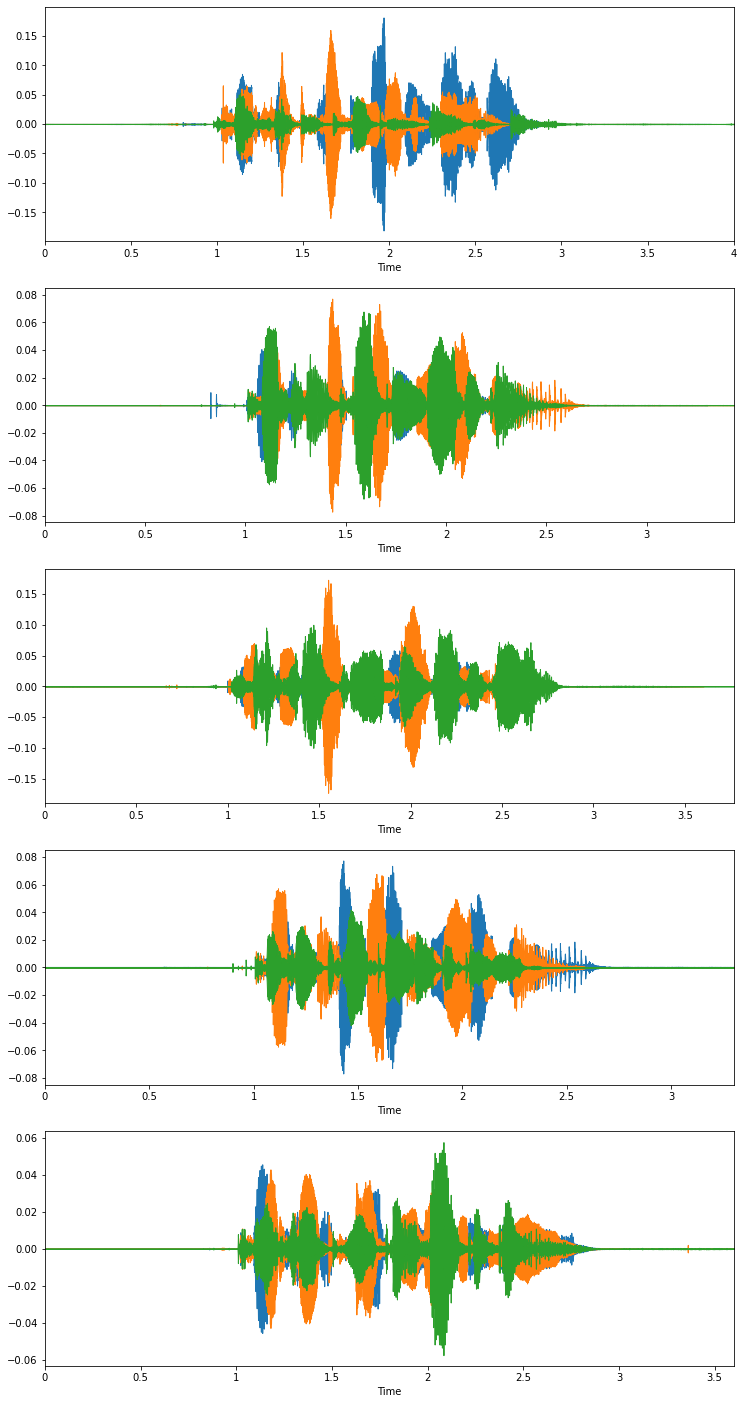

In [30]:
def show_waveplots():
    fig = plt.figure(figsize=(14 * cols , 5 * rows))
    for i, (cat, files) in enumerate(examples_of_cat.items()):
        for j, (path, (time_series, _)) in enumerate(files):
            index = i * cols + j + 1

            ax = plt.subplot(rows, cols, index)
            librosa.display.waveplot(time_series, sr=FRAME_RATE)


show_waveplots()
plt.show()

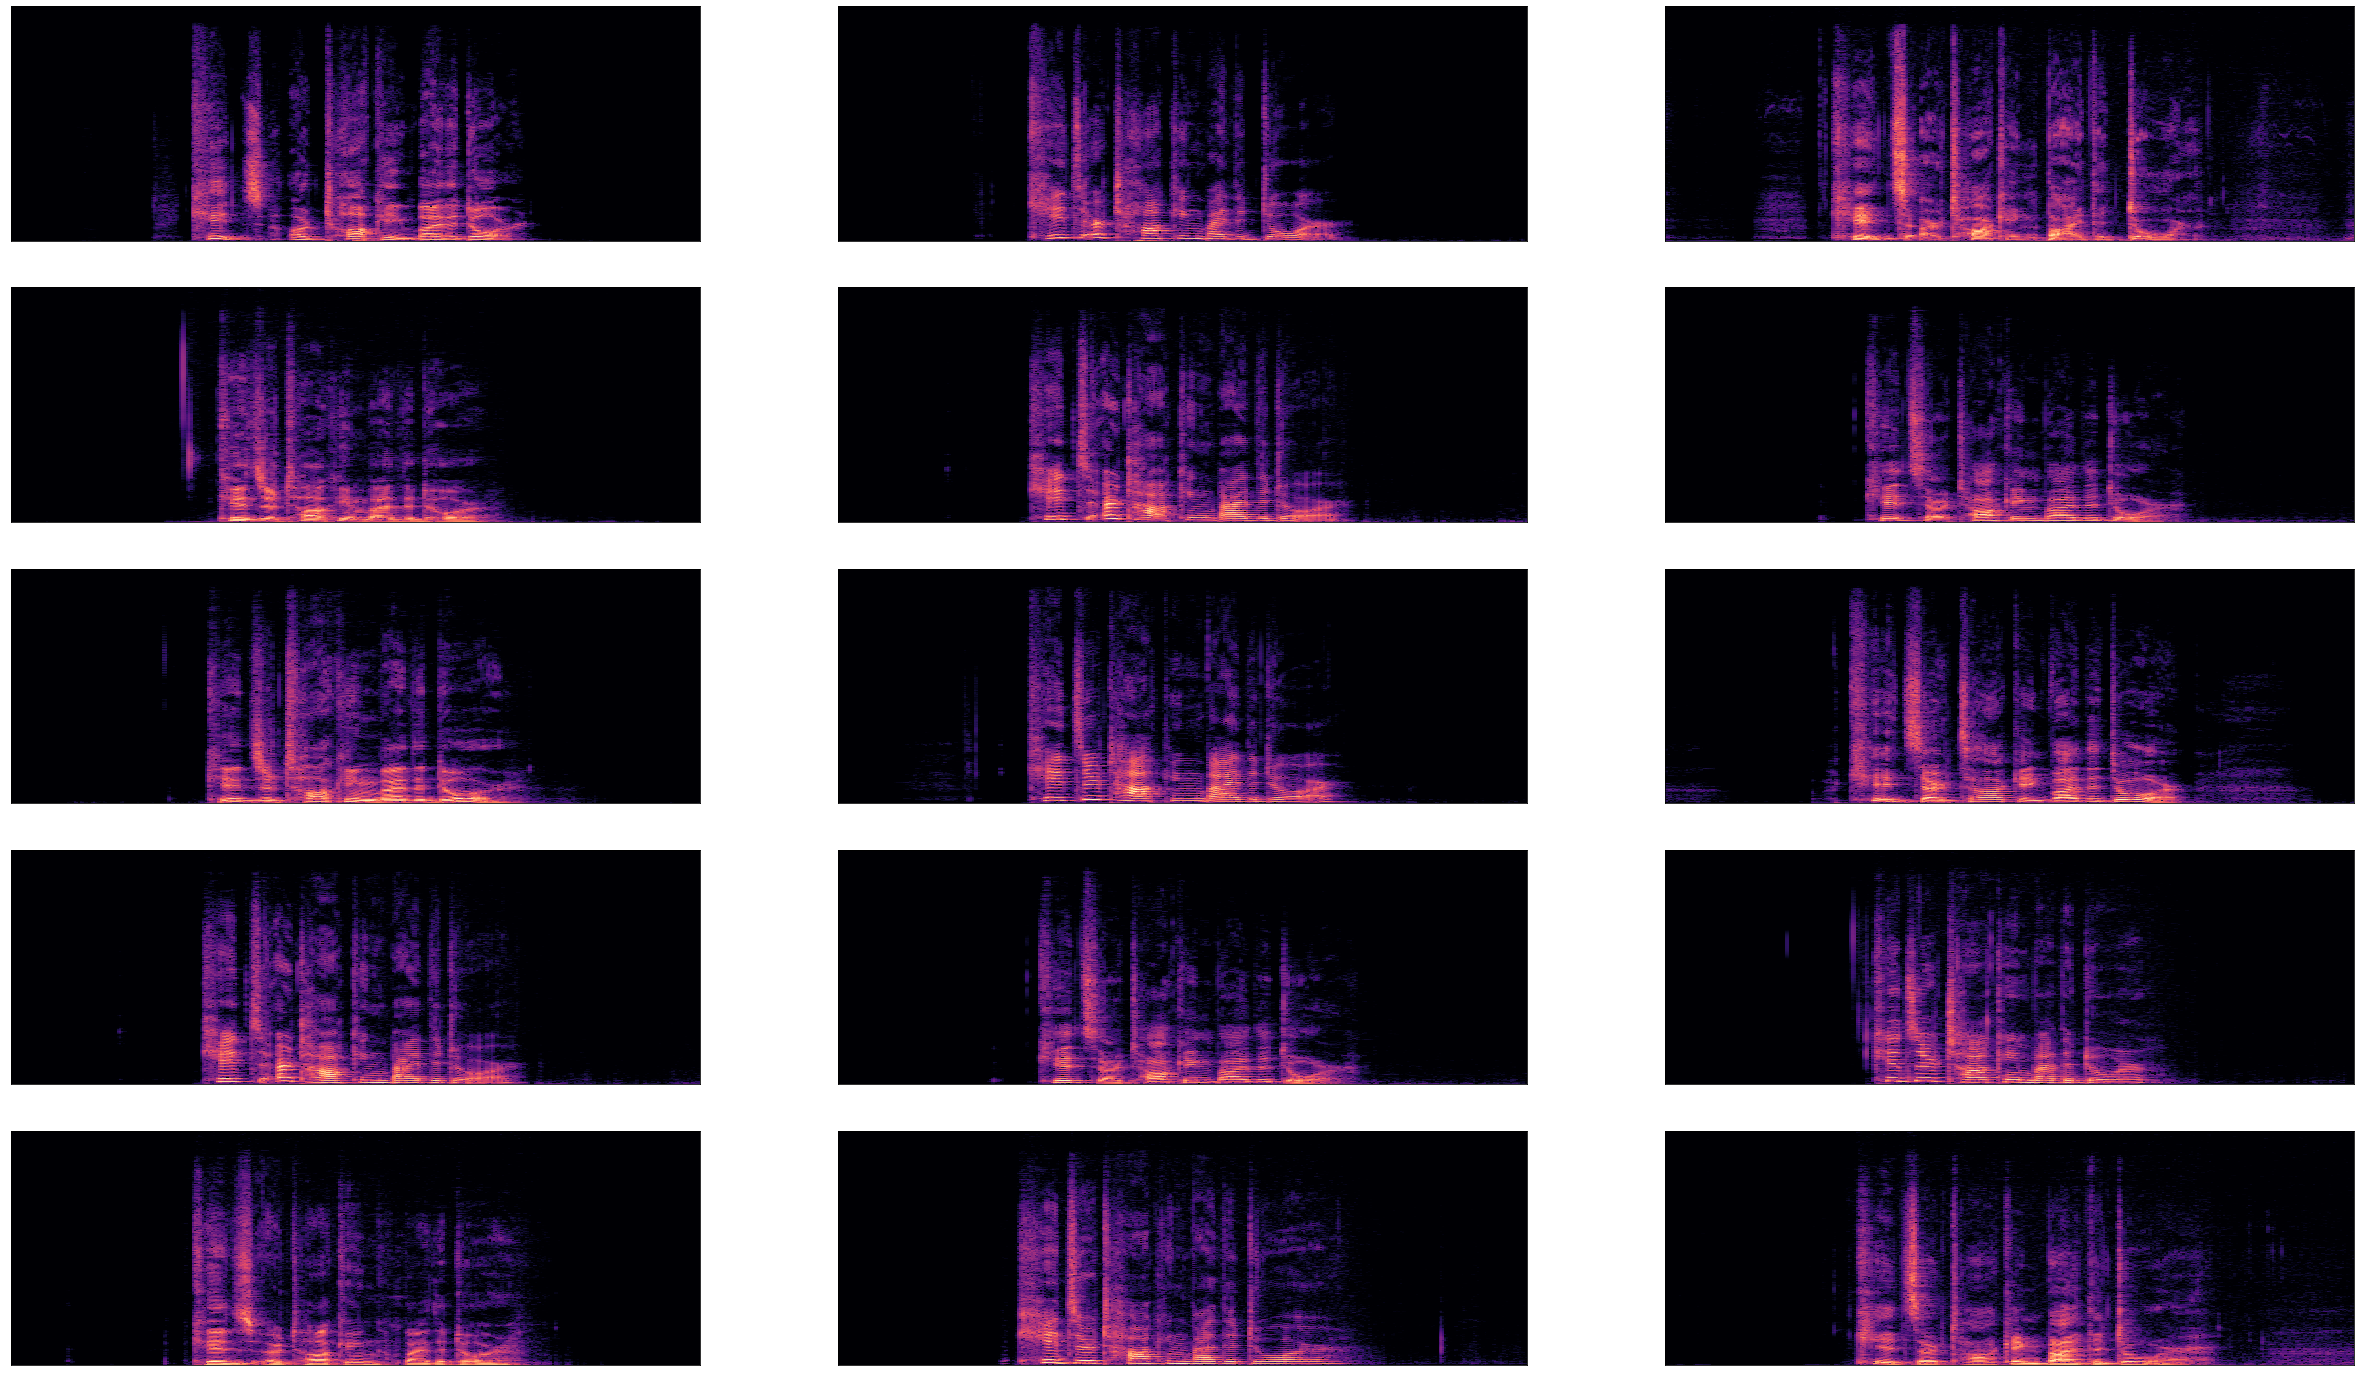

In [32]:
def show_specs():
    fig = plt.figure(figsize=(14 * cols , 5 * rows))
    for i, (cat, files) in enumerate(examples_of_cat.items()):
        for j, (path, (time_series, _)) in enumerate(files):
            index = i * cols + j+ 1
            ax = plt.subplot(rows, cols, index)
            X = librosa.stft(time_series)
            X_db = librosa.amplitude_to_db(abs(X))
            librosa.display.specshow(X_db, sr=FRAME_RATE)


show_specs()
plt.show()

In [ ]:
# todo
#   spectral centroid
#   spectral rolloff
#   zero crossing rate
